# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Подготовка данных

### Импортируем необходимые библиотеки

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.dummy import DummyRegressor

### Читаем csv файлы, выводим данные на экран, смотрим общую информацию

In [2]:
data_train = pd.read_csv('/datasets/gold_recovery_train.csv')
data_test = pd.read_csv('/datasets/gold_recovery_test.csv')
data_full = pd.read_csv('/datasets/gold_recovery_full.csv')

In [3]:
data_train.head(3)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363


In [4]:
data_test.head(3)

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559


In [5]:
data_full.head(3)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363


In [6]:
data = [data_train,data_test,data_full]
name_df =['data_train','data_test','data_full']

In [7]:
def open_data(data):
    print()
    print('Размер таблицы', data.shape, '\n')
    print("Кол-во пропусков ", data.isna().sum().sum())
    print("Кол-во дубликатов ", data.duplicated().sum(),'\n\n')

In [8]:
count = 0
for i in data:
    print(name_df[count])
    open_data(i)
    count +=1

data_train

Размер таблицы (16860, 87) 

Кол-во пропусков  30320
Кол-во дубликатов  0 


data_test

Размер таблицы (5856, 53) 

Кол-во пропусков  2360
Кол-во дубликатов  0 


data_full

Размер таблицы (22716, 87) 

Кол-во пропусков  36587
Кол-во дубликатов  0 




Посмотрим количество пропусков в процентном соотношении.

In [9]:
def find_null(data):
    print("|{: <60}|".format("Столбец"),"{: <20}|".format("количество пропусков"),"{: <25}|".format("процентов от общего числа"))
    print('---------------------------------------------------------------------------------------------------------------')
    for i in data.columns:
        if data[i].isna().sum() != 0:
            print("|{: <60}|".format(i),"{: ^20}|".format(data[i].isna().sum()),"{: ^25.1%}|".format(data[i].isna().sum()/data.shape[0]))

In [10]:
count = 0
for i in data:
    print(name_df[count])
    find_null(i)
    print('\n\n')
    count+=1

data_train
|Столбец                                                     | количество пропусков| процентов от общего числа|
---------------------------------------------------------------------------------------------------------------
|final.output.concentrate_ag                                 |          72         |           0.4%           |
|final.output.concentrate_pb                                 |          72         |           0.4%           |
|final.output.concentrate_sol                                |         370         |           2.2%           |
|final.output.concentrate_au                                 |          71         |           0.4%           |
|final.output.recovery                                       |         1521        |           9.0%           |
|final.output.tail_ag                                        |          66         |           0.4%           |
|final.output.tail_pb                                        |         183         |         

В данных наблюдаем большое количество пропусков. Избавимся от них в процессе предобработки данных. Дубликаты в данных отсутствуют.

### Проверим, что эффективность обогащения рассчитана правильно. Вычислим её на обучающей выборке для признака rougher.output.recovery. Найдем MAE между нашими расчётами и значением признака. 

In [11]:
data_train_mae = data_train.dropna()

In [12]:
input_recovery = data_train_mae['rougher.output.recovery']

Эффективность обогащения рассчитывается по формуле

In [13]:
C = data_train_mae['rougher.output.concentrate_au']
F = data_train_mae['rougher.input.feed_au']
T = data_train_mae['rougher.output.tail_au']
recovery=((C*(F - T)) / (F*(C - T)))*100

In [14]:
print('"MAE:"',mean_absolute_error(input_recovery, recovery))


"MAE:" 9.555596961987514e-15


Значение MAE близкое к нулю говорит о том, что эффективность обогащения рассчитана правильно.

### Проанализируем признаки, недоступные в тестовой выборке.

In [15]:
other_columns=set(data_full.columns)-set(data_test.columns)
other_columns = list(other_columns)
other_columns

['final.output.concentrate_au',
 'rougher.output.tail_au',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_sol',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'primary_cleaner.output.concentrate_sol',
 'final.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'final.output.concentrate_sol',
 'rougher.output.tail_ag',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'final.output.tail_au',
 'final.output.concentrate_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'final.output.recovery',
 'primary_cleaner.output.tail_ag',
 'rougher.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'secondary_cleaner.output.tail_au',
 'rougher.output.tail_pb',
 'secondary_cleaner.output.tail_ag',
 'final.output.tail_ag',
 'rougher.calculation.sulfate_to_au_concentrate',
 'secondary_cleaner.output.tail_pb',
 'secondary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'roughe

В тестовых данных недоступны параметры готового продукта, т.к эти параметры мы получаем по окончании процесса.

### Проведите предобработку данных.

Добавим в тестовую выборку целевые признаки из full_data ['rougher.output.recovery' и
'final.output.recovery']

In [16]:
data_test = data_test.merge(data_full[['date', 'rougher.output.recovery','final.output.recovery']], on='date')
data_test.shape

(5856, 55)

Оставим в обучающей выборке признаки такие же как и в тестовой.

In [17]:
other_columns=set(data_full.columns)-set(data_test.columns)
other_columns = list(other_columns)

In [18]:
for column in other_columns:
    data_train = data_train.drop([column] , axis=1)

In [19]:
data_train.shape

(16860, 55)

## Анализ данных

### Посмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки.

Найдем признаки несущие информацию о концентрации металлов.

In [20]:
concentrate_output = []
for i in data_full.columns:
    if 'concentrate' in i and 'output' in i:        
        concentrate_output.append(i)

In [21]:
concentrate_output

['final.output.concentrate_ag',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.concentrate_au',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.concentrate_au',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.concentrate_au']

Разделим данные по металлам

In [22]:
data_full_concentrate=data_full.copy()

In [23]:
concentrate_ag = []
concentrate_pb = []
concentrate_au = []
for i in concentrate_output:
    if 'concentrate_ag' in i:        
        concentrate_ag.append(i)
    if 'concentrate_pb' in i:        
        concentrate_pb.append(i)
    if 'concentrate_au' in i:        
        concentrate_au.append(i)
    

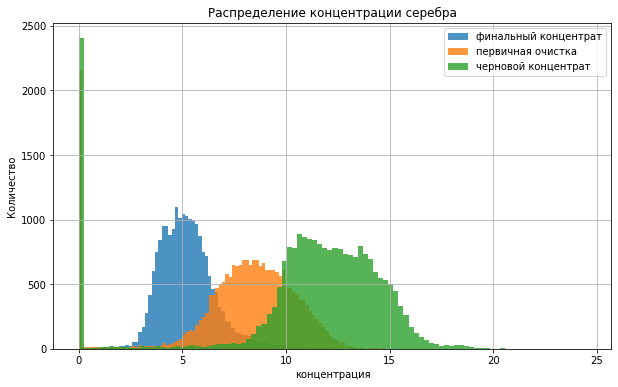

In [24]:
for i in concentrate_ag:
    data_full_concentrate[i].hist(bins=100,alpha=0.8,figsize=(10,6))
plt.title('Распределение концентрации серебра')
plt.xlabel('концентрация')
plt.ylabel('Количество')
_ = plt.legend(['финальный концентрат','первичная очистка','черновой концентрат'])
plt.show()

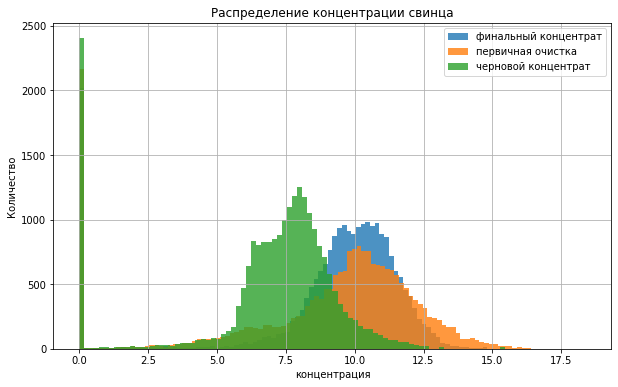

In [25]:
for i in concentrate_pb:
    data_full_concentrate[i].hist(bins=100,alpha=0.8,figsize=(10,6))
plt.title('Распределение концентрации свинца')
plt.xlabel('концентрация')
plt.ylabel('Количество')
_ = plt.legend(['финальный концентрат','первичная очистка','черновой концентрат'])
plt.show()

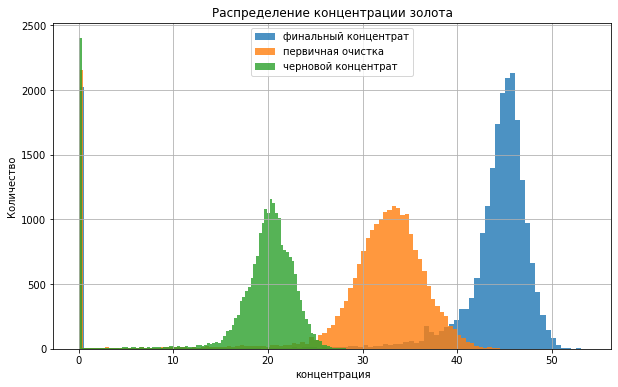

In [26]:
for i in concentrate_au:
    data_full_concentrate[i].hist(bins=100,alpha=0.8,figsize=(10,6))
plt.title('Распределение концентрации золота')
plt.xlabel('концентрация')
plt.ylabel('Количество')
_ = plt.legend(['финальный концентрат','первичная очистка','черновой концентрат'])
plt.show()

- Концентрация золота увеличивается на каждом этапе очистки.  
- Концентрация серебра максимальна в черновом концентрате после флотации.  
- Концентрация свинца также возрастает после первичной очистки и значительно не изменяется в финальном концентрате.

### Сравним распределения размеров гранул сырья на обучающей и тестовой выборках.

feed size — размер гранул сырья

In [27]:
feed_size_input = []
for i in data_full.columns:
    if 'feed_size' in i and 'input' in i:        
        feed_size_input.append(i)

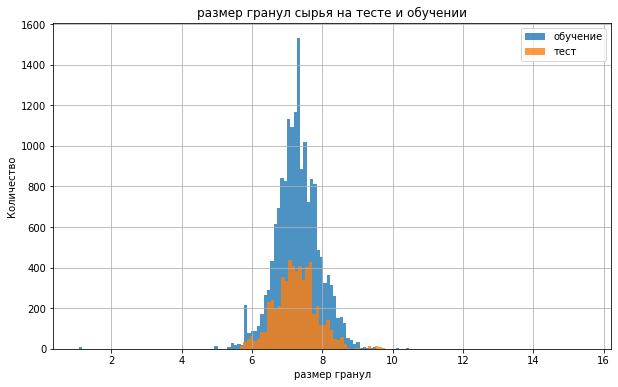

In [28]:
data_train['primary_cleaner.input.feed_size'].hist(bins=100,alpha=0.8,figsize=(10,6))
data_test['primary_cleaner.input.feed_size'].hist(bins=100,alpha=0.8)
plt.title('размер гранул сырья на тесте и обучении')
plt.xlabel('размер гранул')
plt.ylabel('Количество')
_ = plt.legend(['обучение','тест'])
plt.show()

Распределения размеров гранул сырья визуально схожи.



### Исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах. 

In [29]:
data_all_concentrate = data_full.copy()

Найдем данные несущие информацию о концентрации веществ после каждой стадии

In [30]:
concentrate = []
for i in data_all_concentrate.columns:
    if 'concentrate' in i:        
        concentrate.append(i)
concentrate

['final.output.concentrate_ag',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.concentrate_au',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.concentrate_au',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.concentrate_au']

Найдем данные несущие информацию о концентрации веществ вначале процесса очистки.

In [31]:
feed_input = []
for i in data_all_concentrate.columns:
    if 'input' in i:        
        feed_input.append(i)
feed_input

['primary_cleaner.input.sulfate',
 'primary_cleaner.input.depressant',
 'primary_cleaner.input.feed_size',
 'primary_cleaner.input.xanthate',
 'rougher.input.feed_ag',
 'rougher.input.feed_pb',
 'rougher.input.feed_rate',
 'rougher.input.feed_size',
 'rougher.input.feed_sol',
 'rougher.input.feed_au',
 'rougher.input.floatbank10_sulfate',
 'rougher.input.floatbank10_xanthate',
 'rougher.input.floatbank11_sulfate',
 'rougher.input.floatbank11_xanthate']

In [32]:
data_all_concentrate['sum_conc_final'] = data_all_concentrate[['final.output.concentrate_ag',
                                                               'final.output.concentrate_pb',
                                                               'final.output.concentrate_sol',
                                                               'final.output.concentrate_au']].sum(axis=1)
    
data_all_concentrate['sum_primary_cleaner'] = data_all_concentrate[['primary_cleaner.output.concentrate_ag',
                                                               'primary_cleaner.output.concentrate_pb',
                                                               'primary_cleaner.output.concentrate_sol',
                                                               'primary_cleaner.output.concentrate_au']].sum(axis=1)
data_all_concentrate['sum_rougher'] = data_all_concentrate[['rougher.output.concentrate_ag',
                                                               'rougher.output.concentrate_pb',
                                                               'rougher.output.concentrate_sol',
                                                               'rougher.output.concentrate_au']].sum(axis=1)
data_all_concentrate['sum_input'] = data_all_concentrate[['rougher.input.feed_ag',
                                                          'rougher.input.feed_pb',
                                                          'rougher.input.feed_sol',
                                                          'rougher.input.feed_au']].sum(axis=1)

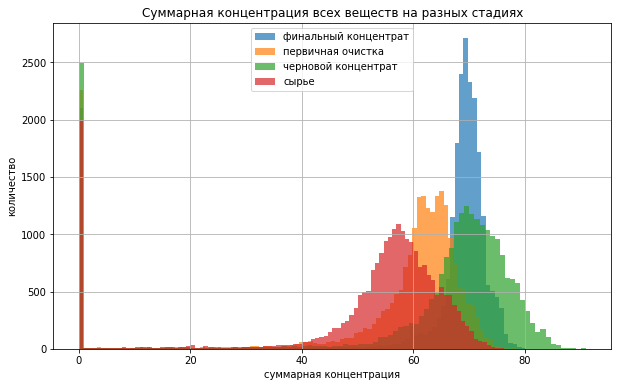

In [33]:
plt.figure(figsize=(10,6))
data_all_concentrate['sum_conc_final'].hist(bins=100,alpha=0.7)
data_all_concentrate['sum_primary_cleaner'].hist(bins=100,alpha=0.7)
data_all_concentrate['sum_rougher'].hist(bins=100,alpha=0.7)
data_all_concentrate['sum_input'].hist(bins=100,alpha=0.7)
plt.title('Суммарная концентрация всех веществ на разных стадиях')
plt.xlabel('суммарная концентрация')
plt.ylabel('количество')
_ = plt.legend(['финальный концентрат','первичная очистка','черновой концентрат','сырье'])
plt.show()


In [34]:
data_conc_bocplot=data_all_concentrate.loc[:,['sum_conc_final', 'sum_primary_cleaner', 'sum_rougher','sum_input']]

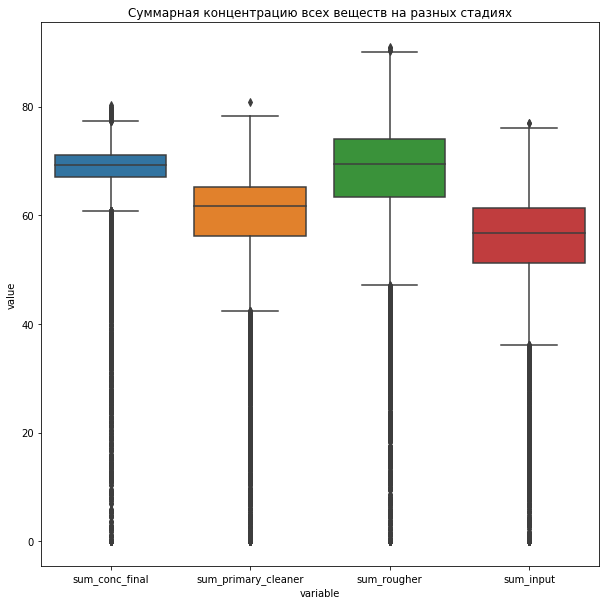

In [35]:
plt.figure(figsize=(10,10))
plt.title("Суммарная концентрацию всех веществ на разных стадиях")
sns.boxplot(x="variable", y="value", data=pd.melt(data_conc_bocplot))
plt.show()

В данных наблюдается множество нулевых значений и пропусков. Эти наблюдения означают, что в этот момент в установке было пусто, значит, вообще не факт, что шел процесс обработки либо это ошибка измерений. Удалим нулевые значения в данных сырья поступающего на очистку и в целевых признаках. Так же удалим пропуски в данных.

In [36]:
data_train_good = data_train.copy()
data_test_good = data_test.copy()
data_train_good.replace(0, np.nan, inplace=True)
data_test_good.replace(0, np.nan, inplace=True)

In [37]:
data_train_good = data_train.dropna()
data_test_good = data_test.dropna()
data_train_good=data_train_good.reset_index(drop=True)
data_test_good=data_test_good.reset_index(drop=True)

## Модель

### Напишим функцию для вычисления итоговой sMAPE.

In [38]:
def total_smape(smape_rougher,smape_final):
    return 0.25*smape_rougher + 0.75*smape_final

### Обучим разные модели и оценим их качество кросс-валидацией.

Для обучающих и тестовых данных извлечем признаки и целевой признак.

Целевой признак -'rougher.output.recovery' - 

In [39]:
features_train_rougher = data_train_good.drop(['rougher.output.recovery','final.output.recovery','date'], axis=1)
target_train_rougher = data_train_good['rougher.output.recovery'] 
features_test_rougher = data_test_good.drop(['rougher.output.recovery','final.output.recovery','date'], axis=1) 
target_test_rougher = data_test_good['rougher.output.recovery'] 

Целевой признак -'final.output.recovery'-

In [40]:
features_train_final = data_train_good.drop(['rougher.output.recovery','final.output.recovery','date'], axis=1)
target_train_final = data_train_good['final.output.recovery'] 
features_test_final = data_test_good.drop(['rougher.output.recovery','final.output.recovery','date'], axis=1)
target_test_final = data_test_good['final.output.recovery'] 

Создаём объект структуры StandardScaler() и настраиваем его на обучающих данных и масштабируем численные признаки.

In [41]:
def scale(features_train, features_test):
    

    scaler = StandardScaler()
    cols_train = features_train.columns
    cols_test = features_test.columns
    scaler.fit(features_train[cols_train])
    features_train[cols_train] = scaler.transform(features_train[cols_train])
    features_test[cols_test] = scaler.transform(features_test[cols_test])
    pd.options.mode.chained_assignment = None
    
    
    return features_train, features_test

In [42]:
features_train_rougher, features_test_rougher = scale(features_train_rougher, features_test_rougher)
features_train_final, features_test_final = scale(features_train_final, features_test_final)

In [43]:
features_train_rougher.head()

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,-0.255098,0.297835,-0.14826,0.280500,-0.437702,-0.311161,-0.427903,-0.807763,-0.429701,-0.285943,...,-1.017430,-0.468697,-0.612782,-0.754839,-1.171437,-0.375955,-0.849788,-0.413723,-0.980522,-2.588727
1,-0.294389,0.348729,-0.14826,0.318901,-0.232889,-0.366283,-0.242114,-0.331740,-0.235842,-0.304190,...,-1.021762,-0.528342,-0.641186,-0.697371,-1.151871,-0.423793,-0.866353,-0.416488,-1.007619,-2.429464
2,-0.342991,0.657815,-0.14826,0.287423,-0.035848,-0.341190,-0.056933,-0.353094,-0.042805,-0.347942,...,-1.017751,-0.469348,-0.648362,-0.694006,-1.146418,-0.422742,-0.861271,-0.414881,-1.002250,-2.472607
3,-0.384614,0.659590,-0.14826,0.302539,-0.048168,-0.367578,-0.054868,-0.326306,-0.055418,-0.343944,...,-1.013959,-0.436440,-0.631866,-0.695030,-1.163733,-0.398885,-0.867651,-0.408375,-1.006344,-2.434960
4,-0.499631,0.838817,-0.14826,0.338804,-0.037528,-0.312912,-0.048967,-0.344905,-0.060778,-0.348451,...,-1.015585,-0.416289,-0.640703,-0.692656,-1.171424,-0.462808,-0.882152,-0.410865,-1.007921,-2.474430


Напишим функцию для обучения модели и проверки качества кросс-валидацией, а так же нахождние итоговой sMAPE.

In [44]:
def smape(target,predictions):
    numerator = abs(predictions - target)
    divider = (abs(target) + abs(predictions)) / 2
    summa = (numerator / divider).sum()

    smape = (1 / len(target)) * summa * 100
    return smape

In [45]:
def ml(model):  
    model.fit(features_train_rougher, target_train_rougher)
    predicted_train_rougher = model.predict(features_train_rougher)
    
    
    
    smape_rougher = (cross_val_score(model,features_train_rougher,target_train_rougher, cv=5, 
                                 scoring=make_scorer(smape, greater_is_better = False)).mean())
    
    model.fit(features_train_final, target_train_final)
    predicted_train_final = model.predict(features_train_final)
    
    
    smape_final = (cross_val_score(model,features_train_final,target_train_final, cv=5, 
                                 scoring=make_scorer(smape, greater_is_better = False)).mean())
    
    tot_smape = total_smape(smape_rougher,smape_final)
    
    
    
    return tot_smape, smape_rougher, smape_final


In [46]:
%%time
model = LinearRegression()
tot_smape, smape_rougher, smape_final = ml(model)
print('Средняя оценка качества модели после флотации',-smape_rougher)
print('Средняя оценка качества модели после финальной обработки',-smape_final)
print('sMAPE_FINAL',-tot_smape)


Средняя оценка качества модели после флотации 10.84908323411167
Средняя оценка качества модели после финальной обработки 10.960081893197636
sMAPE_FINAL 10.932332228426144
CPU times: user 1.37 s, sys: 1.72 s, total: 3.1 s
Wall time: 3.1 s


In [47]:
%%time
best_tot_smape = 1000
best_model_dt = None
best_smape_rougher = 1000
best_smape_final = 1000
for depth in range(2,10):
    model_dt = DecisionTreeRegressor(max_depth=depth, random_state=12345)
    tot_smape, smape_rougher, smape_final = ml(model_dt)
    if abs(tot_smape) < abs(best_tot_smape):
        best_model_dt = model_dt
        best_tot_smape = tot_smape
        best_smape_rougher = smape_rougher
        best_smape_final = smape_final


print('Средняя оценка качества модели после флотации',-best_smape_rougher)
print('Средняя оценка качества модели после финальной обработки',-best_smape_final)
print('sMAPE_FINAL',-best_tot_smape)

Средняя оценка качества модели после флотации 11.408268712650305
Средняя оценка качества модели после финальной обработки 9.85364898408284
sMAPE_FINAL 10.242303916224706
CPU times: user 25.6 s, sys: 57 ms, total: 25.7 s
Wall time: 25.8 s


In [48]:
%%time
best_tot_smape = 1000
best_model_rf = None
best_smape_rougher = 1000
best_smape_final = 1000
for est in range(2,10,3):
    for depth in range(2,10,3):
        model_rf = RandomForestRegressor(n_estimators=est,max_depth=depth)
        tot_smape, smape_rougher, smape_final = ml(model_rf)
        if abs(tot_smape) < abs(best_tot_smape):
            best_model_rf = model_rf
            best_tot_smape = tot_smape
            best_smape_rougher = smape_rougher
            best_smape_final = smape_final

print('Средняя оценка качества модели после флотации',-smape_rougher)
print('Средняя оценка качества модели после финальной обработки',-smape_final)
print('sMAPE_FINAL',-tot_smape)

Средняя оценка качества модели после флотации 10.749311884012076
Средняя оценка качества модели после финальной обработки 11.61618125988544
sMAPE_FINAL 11.3994639159171
CPU times: user 1min 22s, sys: 57.1 ms, total: 1min 22s
Wall time: 1min 23s


In [49]:
%%time
model = DummyRegressor()
tot_smape, smape_rougher, smape_final = ml(model)
print('Средняя оценка качества модели после флотации',-smape_rougher)
print('Средняя оценка качества модели после финальной обработки',-smape_final)
print('sMAPE_FINAL',-tot_smape)

Средняя оценка качества модели после флотации 11.010155902144863
Средняя оценка качества модели после финальной обработки 10.33449216808077
sMAPE_FINAL 10.503408101596794
CPU times: user 37.2 ms, sys: 31 µs, total: 37.2 ms
Wall time: 35.9 ms


Лучшая модель DecisionTreeRegressor, со значением метрики smape 10.24 , что лучше чем значение smape константной модели 10.50

Проверим лучшую модель на тестовой выборке

In [50]:
best_model_dt.fit(features_train_rougher, target_train_rougher)
smape_rougher = (cross_val_score(best_model_dt,features_test_rougher,target_test_rougher, cv=5, 
                                 scoring=make_scorer(smape, greater_is_better = False)).mean())
smape_final = (cross_val_score(best_model_dt,features_test_final,target_test_final, cv=5, 
                                 scoring=make_scorer(smape, greater_is_better = False)).mean())
tot_smape = total_smape(smape_rougher,smape_final)
print('Средняя оценка качества модели после флотации',-smape_rougher)
print('Средняя оценка качества модели после финальной обработки',-smape_final)
print('sMAPE_FINAL',-tot_smape)

Средняя оценка качества модели после флотации 10.131802881387884
Средняя оценка качества модели после финальной обработки 8.767873719825399
sMAPE_FINAL 9.10885601021602


## Вывод

- Произвели исследовательский анализ данных, проверили наличие пропусков, дубликатов. В тестовых данных недоступны параметры готового продукта, т.к эти параметры мы получаем по окончании процесса очистки.
- Обнаружили, что концентрация золота увеличивается с каждым этапом, а концентрация серебра снижается после флотации.
- Распределения размеров гранул в train и test выборках одинаковы.
- В данных наблюдается множество нулевых значений и пропусков. Эти наблюдения означают, что в этот момент в установке было пусто, значит, предпологаем, что не шел процесс обработки либо это ошибка измерений. Удалили нулевые значения и пропуски.
- Наилучшая модель - DecisionTreeRegressor дала значение метрики smape 9.10 на тестовой выборке.